In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

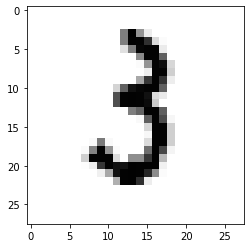

In [6]:
plt.imshow(x_train[1234], cmap='Greys')

In [7]:
x_train[1234].shape

(28, 28)

In [8]:
# CNN 要的是 (28, 28, 1)

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [10]:
x_train[1234].shape

(28, 28, 1)

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [19]:
###3次conv, 3次max
###2 dense
###output: 10
###flilter 大小 3x3
###maxpooling 2x2
###conv01: 4
###conv02: 8
###conv03: 16

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [100]:
model = Sequential()

In [101]:
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))
###padding='same'是再說輸入和輸出矩陣要一樣，所以會補0

In [102]:
model.add(MaxPool2D(pool_size=(2,2)))

In [103]:
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

In [104]:
model.add(MaxPool2D(pool_size=(2,2)))

In [105]:
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

In [106]:
model.add(MaxPool2D(pool_size=(2,2)))

In [107]:
model.add(Flatten())
model.add(Dense(17, activation='relu'))

In [108]:
model.add(Dense(33, activation='relu'))

In [109]:
model.add(Dense(10, activation='softmax'))

In [110]:
#model.compile(loss="categorical_crossentropy",
#              optimizer=Adadelta(),
#              metrics=['accuracy'])

In [111]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 144)               0         
__________

In [114]:
3*3*4+4

40

In [118]:
(3*3*4)*8+8

296

In [119]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

W1023 14:44:00.139395 21280 deprecation_wrapper.py:119] From C:\Users\peter\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1023 14:44:00.278753 21280 deprecation_wrapper.py:119] From C:\Users\peter\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
60000/60000 [==============================] - 34s 572us/step - loss: 0.0898 - acc: 0.1233
Epoch 2/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0895 - acc: 0.2105
Epoch 3/10
60000/60000 [==============================] - 32s 541us/step - loss: 0.0888 - acc: 0.2562
Epoch 4/10
60000/60000 [==============================] - 32s 539us/step - loss: 0.0871 - acc: 0.3044
Epoch 5/10
60000/60000 [==============================] - 32s 538us/step - loss: 0.0760 - acc: 0.4118
Epoch 6/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0449 - acc: 0.6809
Epoch 7/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0278 - acc: 0.8137
Epoch 8/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0203 - acc: 0.8674
Epoch 9/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.0163 - acc: 0.8920
Epoch 10/10
60000/60000 [==============================] - 32s 540us/step - loss: 

In [120]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 246us/step


In [121]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.01185
測試資料的正確率: 0.9215


In [122]:
model.save('myCNNmodel.h5')

In [123]:
del model

In [124]:
from keras.models import load_model

In [125]:
model = load_model('myCNNmodel.h5')

In [126]:
predict = model.predict_classes(x_test)

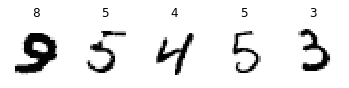

In [127]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")